In [1]:
import os
import glob
import numpy as np
import pandas as pd

from scipy.stats import ttest_ind

In [2]:
f_actin_folder = './1. F-actin/'

In [3]:
scope_list = [str(i+1) for i in range(12)]

In [4]:
# Method 1
f_actin_soft_list = []
f_actin_stiff_list = []
for scope in scope_list:
    f_actin_path = os.path.join(f_actin_folder, scope) + '/'
    
    f_actin_soft_csv_path = os.path.join(f_actin_path, 'Soft/', 'Soft_intden_analysis.csv')
    f_actin_stiff_csv_path = os.path.join(f_actin_path, 'Stiff/', 'Stiff_intden_analysis.csv')

    try:
        f_actin_soft_csv = pd.read_csv(f_actin_soft_csv_path)
    except:
        pass

    try:
        f_actin_stiff_csv = pd.read_csv(f_actin_stiff_csv_path)
    except:
        pass

    f_actin_soft_list.append(f_actin_soft_csv)
    f_actin_stiff_list.append(f_actin_stiff_csv)

f_actin_soft_df = pd.concat(f_actin_soft_list)
f_actin_stiff_df = pd.concat(f_actin_stiff_list)

f_actin_soft_df.reset_index(drop=True, inplace=True)
f_actin_stiff_df.reset_index(drop=True, inplace=True)

intden_soft = f_actin_soft_df[f_actin_soft_df['aspect_ratio']>0]['intden'].tolist()
intden_stiff = f_actin_stiff_df[f_actin_stiff_df['aspect_ratio']>0]['intden'].tolist()

t_stat_m1, p_value_m1 = ttest_ind(intden_stiff, intden_soft)
print(f"T-statistic: {t_stat_m1}, P-value: {p_value_m1}")

T-statistic: 3.4776030383317456, P-value: 0.0006826377914311271


In [5]:
import pandas as pd
print('##### Soft F-actin #####')
print(pd.Series(intden_soft).describe())
print()
print('##### Stiff F-actin #####')
print(pd.Series(intden_stiff).describe())

##### Soft F-actin #####
count    6.700000e+01
mean     5.000465e+06
std      3.607976e+06
min      8.406380e+05
25%      2.176625e+06
50%      3.853552e+06
75%      6.769658e+06
max      1.360175e+07
dtype: float64

##### Stiff F-actin #####
count    6.900000e+01
mean     7.818752e+06
std      5.599923e+06
min      7.301840e+05
25%      2.936286e+06
50%      6.865649e+06
75%      1.076303e+07
max      2.369016e+07
dtype: float64


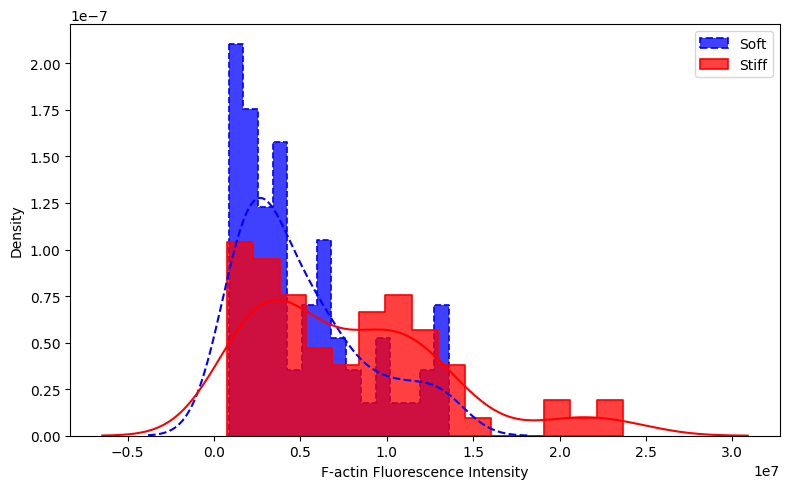

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot: Histogram + KDE
plt.figure(figsize=(8, 5))

# Soft group: histogram (dashed outline)
sns.histplot(
    intden_soft,
    bins=15,
    color='blue',
    label='Soft',
    stat='density',
    element='step',
    linewidth=1.2,
    linestyle='--'
)

# Soft group: KDE (dashed)
sns.kdeplot(
    intden_soft,
    color='blue',
    linestyle='--',
    linewidth=1.5,
    bw_adjust=1
)

# Stiff group: histogram (solid outline)
sns.histplot(
    intden_stiff,
    bins=15,
    color='red',
    label='Stiff',
    stat='density',
    element='step',
    linewidth=1.2
)

# Stiff group: KDE (solid)
sns.kdeplot(
    intden_stiff,
    color='red',
    linestyle='-',
    linewidth=1.5,
    bw_adjust=1
)

# Labels and style
plt.xlabel('F-actin Fluorescence Intensity')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

plt.savefig('./figure/fig5.png', dpi=300)
plt.show()

In [7]:
# 데이터프레임 생성
df = pd.DataFrame({
    'Condition': ['Soft'] * len(intden_soft) + ['Stiff'] * len(intden_stiff),
    'Total intensity': intden_soft + intden_stiff
})

df.to_csv('./figure/vector/(Fig7) KDE.csv', index=False)

In [8]:
# Method 2
ed_soft_list = []
ed_stiff_list = []
for scope in scope_list:
    f_actin_path = os.path.join(f_actin_folder, scope) + '/'

    f_actin_soft_file_list = os.listdir(os.path.join(f_actin_path, 'Soft/'))
    f_actin_stiff_file_list = os.listdir(os.path.join(f_actin_path, 'Stiff/'))

    f_actin_soft_intden_data_list = [f_actin_path+'Soft/'+file for file in f_actin_soft_file_list if 'intden_data' in file]
    f_actin_stiff_intden_data_list = [f_actin_path+'Stiff/'+file for file in f_actin_stiff_file_list if 'intden_data' in file]

    for f_actin_soft_intden_data_path in f_actin_soft_intden_data_list:
        f_actin_soft_intden_data = pd.read_csv(f_actin_soft_intden_data_path)
        soft_euclidean_distance = np.linalg.norm(f_actin_soft_intden_data['red_average_intensity']-f_actin_soft_intden_data['green_average_intensity'])
        ed_soft_list.append(soft_euclidean_distance)

    for f_actin_stiff_intden_data_path in f_actin_stiff_intden_data_list:
        f_actin_stiff_intden_data = pd.read_csv(f_actin_stiff_intden_data_path)
        stiff_euclidean_distance = np.linalg.norm(f_actin_stiff_intden_data['red_average_intensity']-f_actin_stiff_intden_data['green_average_intensity'])
        ed_stiff_list.append(stiff_euclidean_distance)

t_stat_m2, p_value_m2 = ttest_ind(ed_soft_list, ed_stiff_list, nan_policy='omit')
print(f"T-statistic: {t_stat_m2}, P-value: {p_value_m2}")

T-statistic: -0.8446190271396408, P-value: 0.399911865941191
